In [1]:
import sys

sys.path.insert(1, '/Users/users/spirov/ThesisProject/Executable')


from sklearn.manifold import TSNE
import pandas as pd
import os, os.path
import h5py
import matplotlib
import datetime
import matplotlib.pyplot as plt
import numpy as np
import scipy
from scipy.io.idl import readsav
from astropy.io import fits

from matplotlib import rcParams, cycler
import matplotlib.colors as mcolors

import vaex


/var/lib/condor/execute/dir_85082/ipykernel_85150/3488819352.py:15: DeprecationWarning: Please import `readsav` from the `scipy.io` namespace; the `scipy.io.idl` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.io.idl import readsav


In [2]:

dataPath = "/Users/users/spirov/Blk/Nexus Project/Thesis-Project-Cosmic-Web/Data/Training/"




lengt = len(os.listdir(dataPath))


CZs = []
Rs = []
Ths = []
Fs = []

for i in range(lengt):
    fil = dataPath + os.listdir(dataPath)[i]
    df = vaex.open(fil)
    
    CZs.append(df.CZ.values)
    Rs.append(df.R.values)
    Ths.append(df.Th.values)
    Fs.append(df.Fi.values)
    
    

In [3]:
matrix = np.array((Rs,Ths,Fs))

In [4]:
matrix.shape

(3, 512, 111992)

In [59]:
singleMatrix = matrix[:,0,:].T

In [60]:


tsne_single = TSNE(n_components=2, perplexity=30, learning_rate = 4).fit_transform(singleMatrix)
tsne_single.shape

(111992, 2)

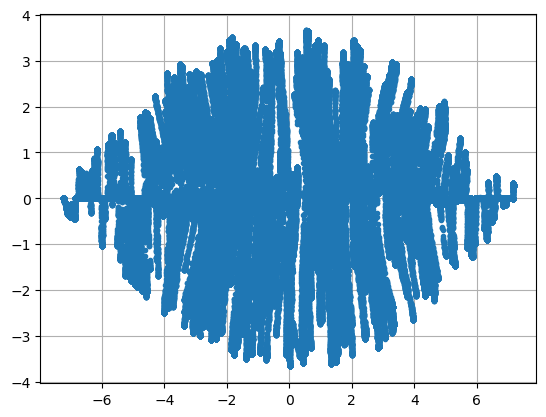

In [61]:
plt.plot(tsne_single[:,0], tsne_single[:,1], '.')
plt.grid()

In [62]:
tsne_single.shape

(111992, 2)

In [63]:
CZ = np.array(CZs)[0,:]

In [64]:
Rs=matrix[0,0,:]

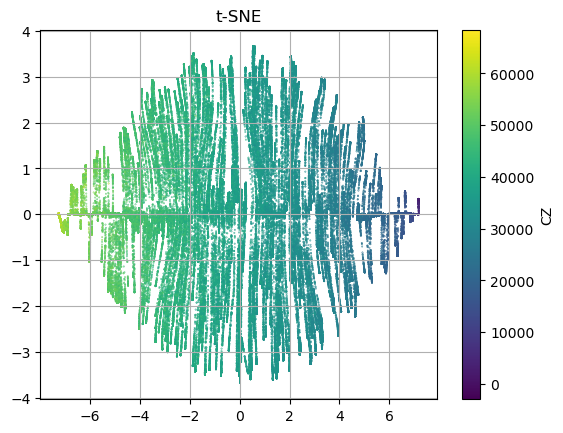

In [66]:
plt.scatter(tsne_single[:,0], tsne_single[:,1],c = CZ,s=0.1)
plt.grid()
cb = plt.colorbar()
cb.set_label("CZ")
plt.title("t-SNE")
plt.show()

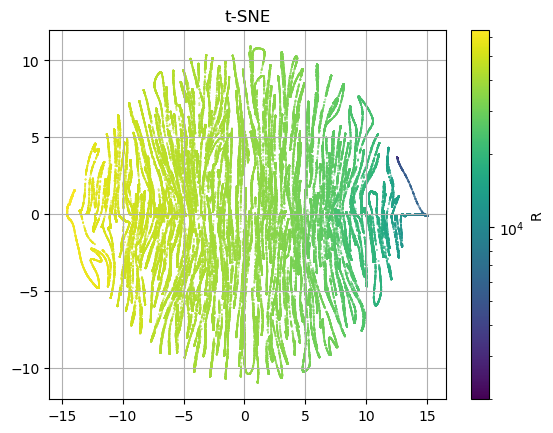

In [47]:
plt.scatter(tsne_single[:,0], tsne_single[:,1],c = Rs,s=0.1,norm=matplotlib.colors.LogNorm())
plt.grid()
cb = plt.colorbar()
cb.set_label("R")
plt.title("t-SNE")
plt.show()

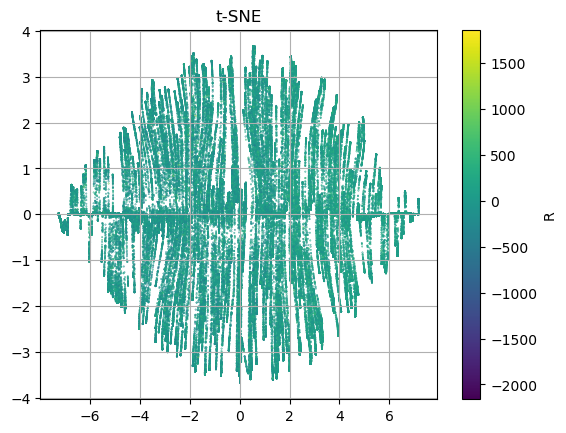

In [70]:
plt.scatter(tsne_single[:,0], tsne_single[:,1],c = (CZ-Rs)/10,s=0.1)
plt.grid()
cb = plt.colorbar()
cb.set_label("R")
plt.title("t-SNE")
plt.show()

In [68]:
vS = np.abs(CZ-Rs)
vS /=np.max(vS)



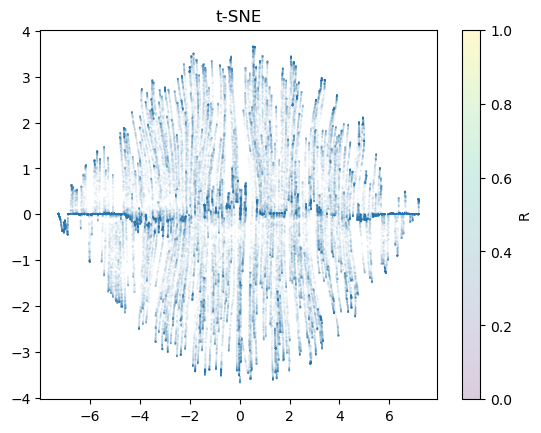

In [69]:
VS = np.exp(vS)*1e-2

plt.scatter(tsne_single[:,0], tsne_single[:,1],s=VS,alpha=0.2)
#plt.grid()
cb = plt.colorbar()
cb.set_label("R")
plt.title("t-SNE")
plt.show()

# Cooking

In [8]:
matrix[0].shape

(512, 111992)

In [9]:


tsne_cooked = TSNE(n_components=2, perplexity=30, learning_rate = 40).fit_transform(matrix[0])
tsne_cooked.shape

NameError: name 'tsne_single' is not defined

In [14]:
matrix[0].shape

(512, 111992)

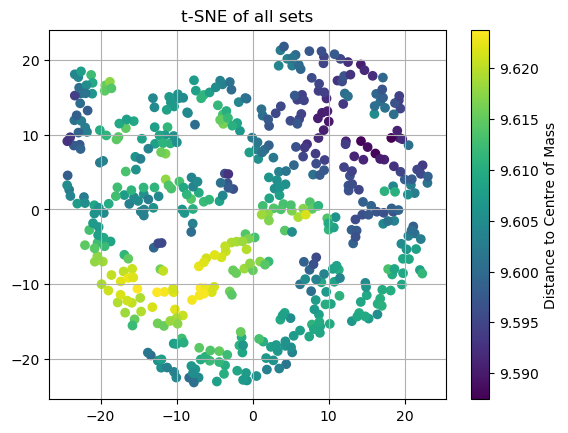

In [22]:

cMas = np.log10(matrix[0].sum(1))
plt.scatter(tsne_cooked[:,0], tsne_cooked[:,1],c=cMas)
plt.grid()
cb = plt.colorbar()
cb.set_label("Distance to Centre of Mass")
plt.title("t-SNE of all sets")
plt.show()

# Baking

In [24]:
matrix[0].T.shape

(111992, 512)

In [25]:


tsne_baked = TSNE(n_components=2, perplexity=30, learning_rate = 40).fit_transform(matrix[0].T)
tsne_baked.shape

(512, 2)

In [45]:
RBig = matrix[0].sum(0)

In [48]:
CBig = np.sum(CZs,0)

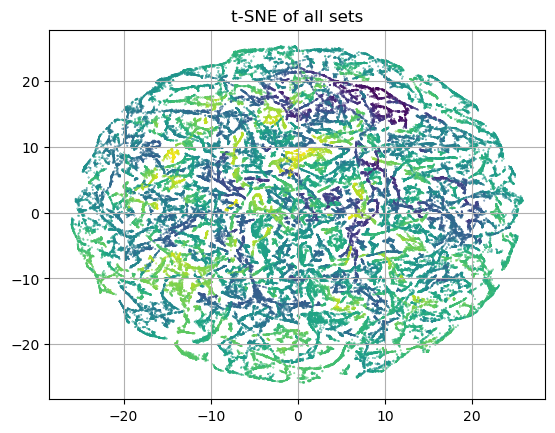

In [46]:

#cMas = np.log10(matrix[0].sum(1))
plt.scatter(tsne_baked[:,0], tsne_baked[:,1],s=0.1,c=RBig)
plt.grid()
#cb = plt.colorbar()
#cb.set_label("Distance to Centre of Mass")
plt.title("t-SNE of all sets")
plt.show()

In [55]:
logv = np.log10(np.abs((CBig-RBig)/10))

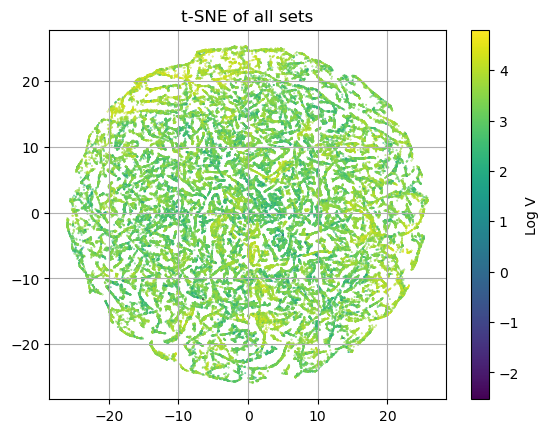

In [57]:

#cMas = np.log10(matrix[0].sum(1))
plt.scatter(tsne_baked[:,0], tsne_baked[:,1],s=0.1,c=logv)
plt.grid()
cb = plt.colorbar()
cb.set_label("Log V")
plt.title("t-SNE of all sets")
plt.show()

(512, 111992)